In [213]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rcParams

In [214]:
data =  pd.read_csv('/home/u108-n256/PalmProject/CrossValidation/Summary_Scores.csv')

male_data =  data[data['Flower'] == 'male']
female_data =  data[data['Flower'] == 'female']

print(male_data.groupby('Data')['RMSE'].mean())
print(female_data.groupby('Data')['RMSE'].mean())

Data
AllData                                            0.037223
Excluding bunchload                                0.047189
Excluding flowers male and female                  0.043957
Excluding flowers male and female and bunchload    0.052063
only BunchLoad data                                0.048353
only Meteorological data                           0.074473
only Phenological data                             0.068373
Name: RMSE, dtype: float64
Data
AllData                                            0.056589
Excluding bunchload                                0.066664
Excluding flowers male and female                  0.060211
Excluding flowers male and female and bunchload    0.058600
only BunchLoad data                                0.067524
only Meteorological data                           0.070831
only Phenological data                             0.069354
Name: RMSE, dtype: float64


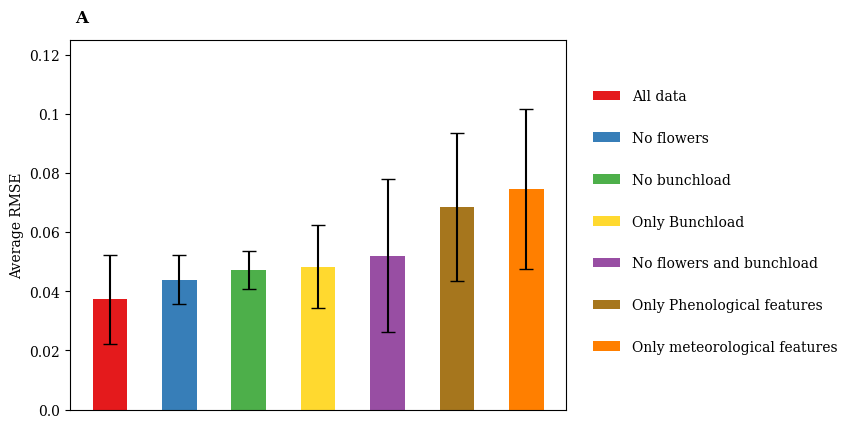

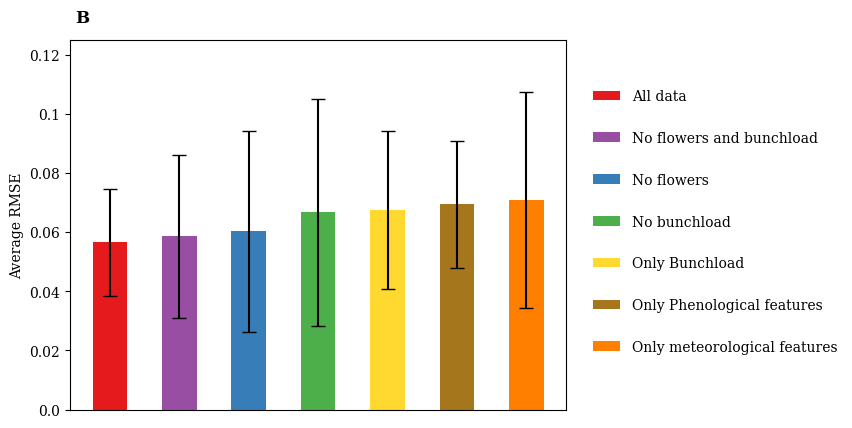

In [215]:
def bar_plot(data, letter, name_to_save):
    rcParams['font.family'] = 'serif'  # Change to a serif font\
    
    data = data.drop(columns=['Model','Flower'])
    means = data.groupby(['Data']).mean().reset_index().sort_values(by='RMSE')
    stds = data.groupby(['Data']).std().reset_index().sort_values(by='RMSE')

    names = {'AllData':['All data', '#e41a1c'],
             'Excluding flowers male and female':['No flowers',"#377eb8"],
             'Excluding bunchload':['No bunchload',"#4daf4a"], 
             'Excluding flowers male and female and bunchload':['No flowers and bunchload',"#984ea3"], 
             'only Meteorological data':['Only meteorological features',"#ff7f00"],
             'only BunchLoad data':['Only Bunchload',"#ffd92f"], 
             'only Phenological data':['Only Phenological features',"#a6761d"],}
    

    bar_width = 0.25
    x1 = 0
    for d in means['Data'].unique():
        plt.bar(x1, means[means['Data'] == d]['RMSE'] , width=bar_width, label=names[d][0], color=names[d][1], yerr=stds[stds['Data'] == d]['RMSE'], capsize=5)
        x1 += bar_width*2
    plt.text(-0.25, 0.131, fontsize=12, fontweight='bold',s=f"{letter}")    
    plt.legend(ncol=1, loc='upper center', bbox_to_anchor=(1.3, 0.90), frameon=False, labelspacing=2)
    plt.ylim(0, 0.125)
    plt.yticks(np.arange(0, 0.13, 0.02), np.arange(0, 0.13, 0.02))
    plt.xticks([])
    #ticks = np.arange(0, data['RMSE'].max()*1.05, 0.01) if data['RMSE'].max() < 0.1 else np.arange(0, data['RMSE'].max()*1.05, 0.02)
    #plt.yticks(ticks=ticks)
    plt.ylabel('Average RMSE')
    plt.savefig(os.path.join('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/Graphs',name_to_save),bbox_inches='tight')
    plt.show()

bar_plot(male_data,'A', 'CrossVal_male.svg')
bar_plot(female_data,'B', 'CrossVal_female.svg')

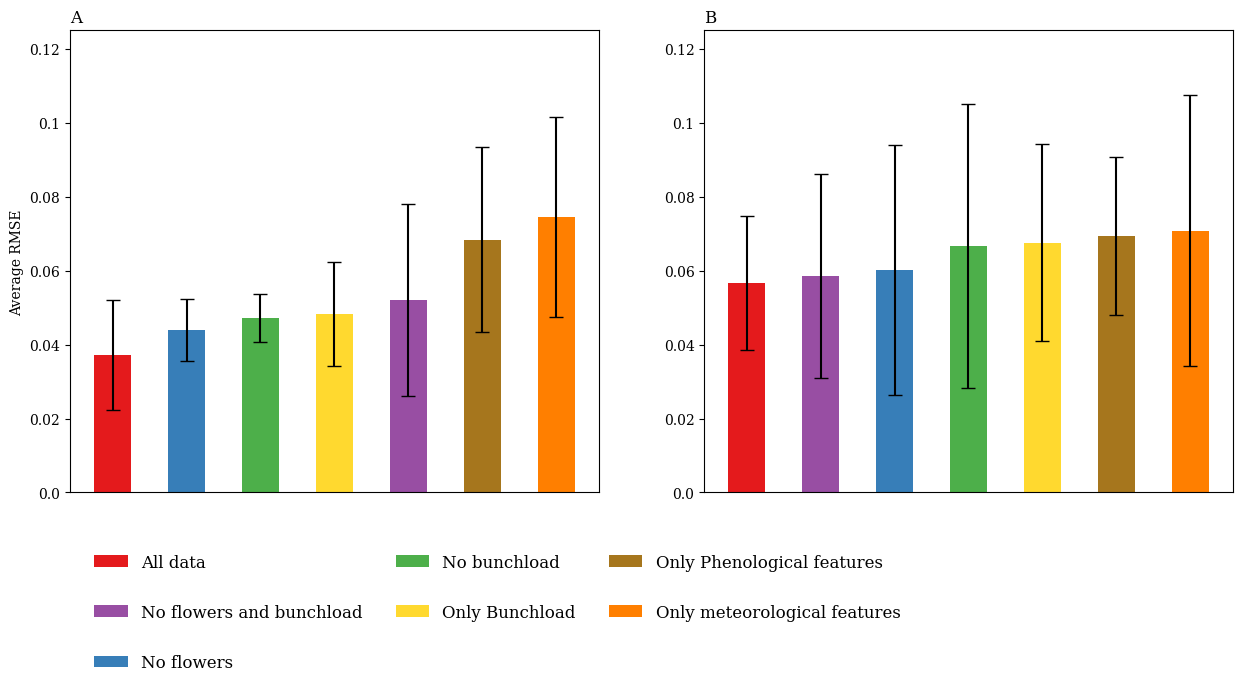

In [216]:
rcParams['font.family'] = 'serif'  # Change to a serif font\

male_data = male_data.drop(columns=['Model','Flower'])
means = male_data.groupby(['Data']).mean().reset_index().sort_values(by='RMSE')
stds = male_data.groupby(['Data']).std().reset_index().sort_values(by='RMSE')

names = {'AllData':['All data', '#e41a1c'],
            'Excluding flowers male and female':['No flowers',"#377eb8"],
            'Excluding bunchload':['No bunchload',"#4daf4a"], 
            'Excluding flowers male and female and bunchload':['No flowers and bunchload',"#984ea3"], 
            'only Meteorological data':['Only meteorological features',"#ff7f00"],
            'only BunchLoad data':['Only Bunchload',"#ffd92f"], 
            'only Phenological data':['Only Phenological features',"#a6761d"],}


bar_width = 0.25
x1 = 0

fig, [ax1,ax2] = plt.subplots(ncols=2, nrows=1, figsize=(15,6))

for d in means['Data'].unique():
    ax1.bar(x1, means[means['Data'] == d]['RMSE'] , width=bar_width, label=names[d][0], color=names[d][1], yerr=stds[stds['Data'] == d]['RMSE'], capsize=5)
    x1 += bar_width*2

female_data  = female_data .drop(columns=['Model','Flower'])
means = female_data .groupby(['Data']).mean().reset_index().sort_values(by='RMSE')
stds = female_data .groupby(['Data']).std().reset_index().sort_values(by='RMSE')  

for d in means['Data'].unique():
    ax2.bar(x1, means[means['Data'] == d]['RMSE'] , width=bar_width, label=names[d][0], color=names[d][1], yerr=stds[stds['Data'] == d]['RMSE'], capsize=5)
    x1 += bar_width*2

ax1.set_title('A', loc='left')    
ax1.set_ylim(0, 0.125)
ax1.set_yticks(np.arange(0, 0.13, 0.02), np.arange(0, 0.13, 0.02))
ax1.set_xticks([])
#ticks = np.arange(0, data['RMSE'].max()*1.05, 0.01) if data['RMSE'].max() < 0.1 else np.arange(0, data['RMSE'].max()*1.05, 0.02)
#plt.yticks(ticks=ticks)
ax1.set_ylabel('Average RMSE')

ax2.set_title('B', loc='left')   
ax2.set_ylim(0, 0.125)
ax2.set_yticks(np.arange(0, 0.13, 0.02), np.arange(0, 0.13, 0.02))
ax2.set_xticks([])
#ticks = np.arange(0, data['RMSE'].max()*1.05, 0.01) if data['RMSE'].max() < 0.1 else np.arange(0, data['RMSE'].max()*1.05, 0.02)
#plt.yticks(ticks=ticks)
#ax2.set_ylabel('Average RMSE')

plt.legend(ncol=1, bbox_to_anchor=(0.4, -0.1), frameon=False, labelspacing=2, ncols=3, fontsize='large')
plt.savefig(os.path.join('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/Graphs','CrossValidation_Comparison.svg'),bbox_inches='tight')
plt.show()

In [217]:
data =  pd.read_csv('/home/u108-n256/PalmProject/CrossValidation_1/Summary_Scores.csv')

male_data =  data[data['Flower'] == 'male']
female_data =  data[data['Flower'] == 'female']

print(male_data.groupby('Data')['RMSE'].mean())
print(female_data.groupby('Data')['RMSE'].mean())

Data
EXbunchload             0.044382
EXflowersmf             0.039680
EXflowersmfbunchload    0.047511
alldata                 0.030448
onlybunchload           0.056975
onlymeteo               0.051012
onlypheno               0.060167
Name: RMSE, dtype: float64
Data
EXbunchload             0.084552
EXflowersmf             0.090354
EXflowersmfbunchload    0.085960
alldata                 0.094191
onlybunchload           0.149982
onlymeteo               0.092384
onlypheno               0.137718
Name: RMSE, dtype: float64


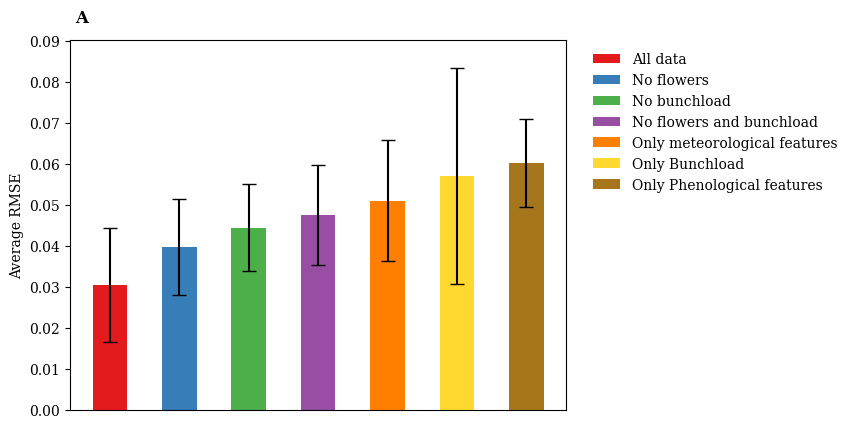

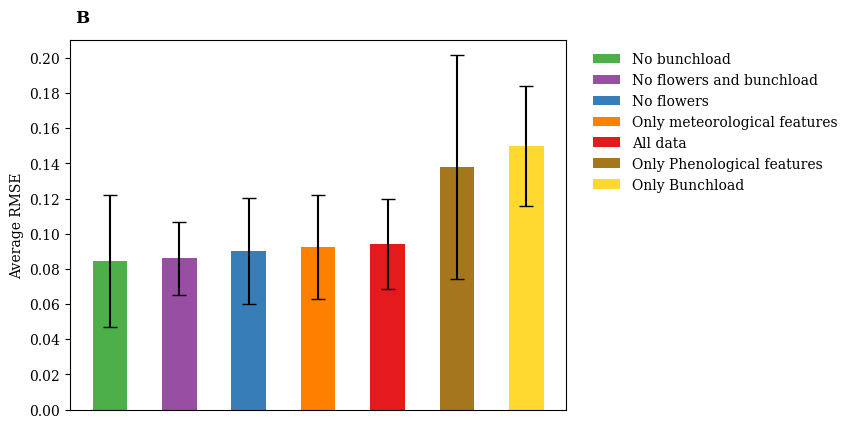

In [218]:
def bar_plot(data, letter, name_to_save):
    rcParams['font.family'] = 'serif'  # Change to a serif font\
    
    data = data.drop(columns=['Model','Flower'])
    means = data.groupby(['Data']).mean().reset_index().sort_values(by='RMSE')
    stds = data.groupby(['Data']).std().reset_index().sort_values(by='RMSE')
    
    names = {'alldata':['All data', '#e41a1c'],
             'EXflowersmf':['No flowers',"#377eb8"],
             'EXbunchload':['No bunchload',"#4daf4a"], 
             'EXflowersmfbunchload':['No flowers and bunchload',"#984ea3"], 
             'onlymeteo':['Only meteorological features',"#ff7f00"],
             'onlybunchload':['Only Bunchload',"#ffd92f"], 
             'onlypheno':['Only Phenological features',"#a6761d"],}

    bar_width = 0.25
    x1 = 0
    for d in means['Data'].unique():
        plt.bar(x1, means[means['Data'] == d]['RMSE'] , width=bar_width, label=names[d][0], color=names[d][1], yerr=stds[stds['Data'] == d]['RMSE'], capsize=5)
        x1 += bar_width*2
    plt.text(-0.25, data['RMSE'].max()*1.1, fontsize=12, fontweight='bold',s=f"{letter}")    
    plt.legend(ncol=1, loc='upper center', bbox_to_anchor=(1.3, 1), frameon=False)
    plt.ylim(0, data['RMSE'].max()*1.05)
    plt.xticks([])
    ticks = np.arange(0, data['RMSE'].max()*1.05, 0.01) if data['RMSE'].max() < 0.1 else np.arange(0, data['RMSE'].max()*1.05, 0.02)
    plt.yticks(ticks=ticks)
    plt.ylabel('Average RMSE')
    #plt.savefig(os.path.join('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/Graphs',name_to_save),bbox_inches='tight')
    plt.show()

bar_plot(male_data,'A', 'CrossVal_male.svg')
bar_plot(female_data,'B', 'CrossVal_female.svg')